In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
# df['Resume'][0]

df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

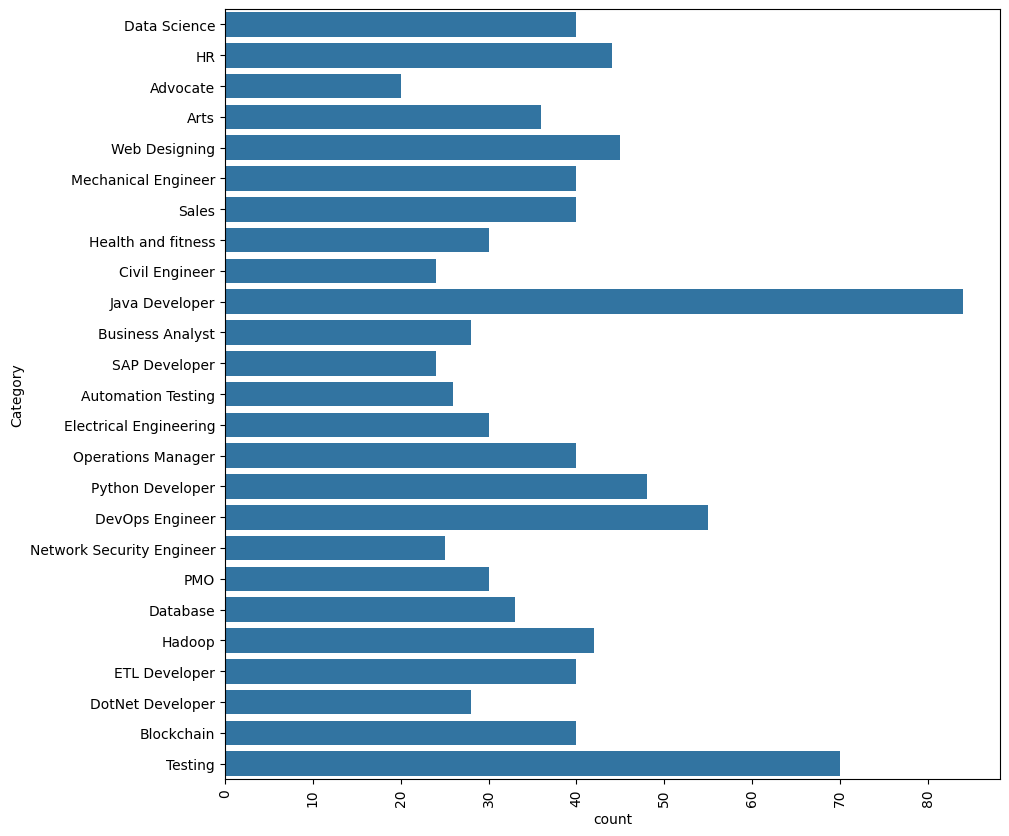

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

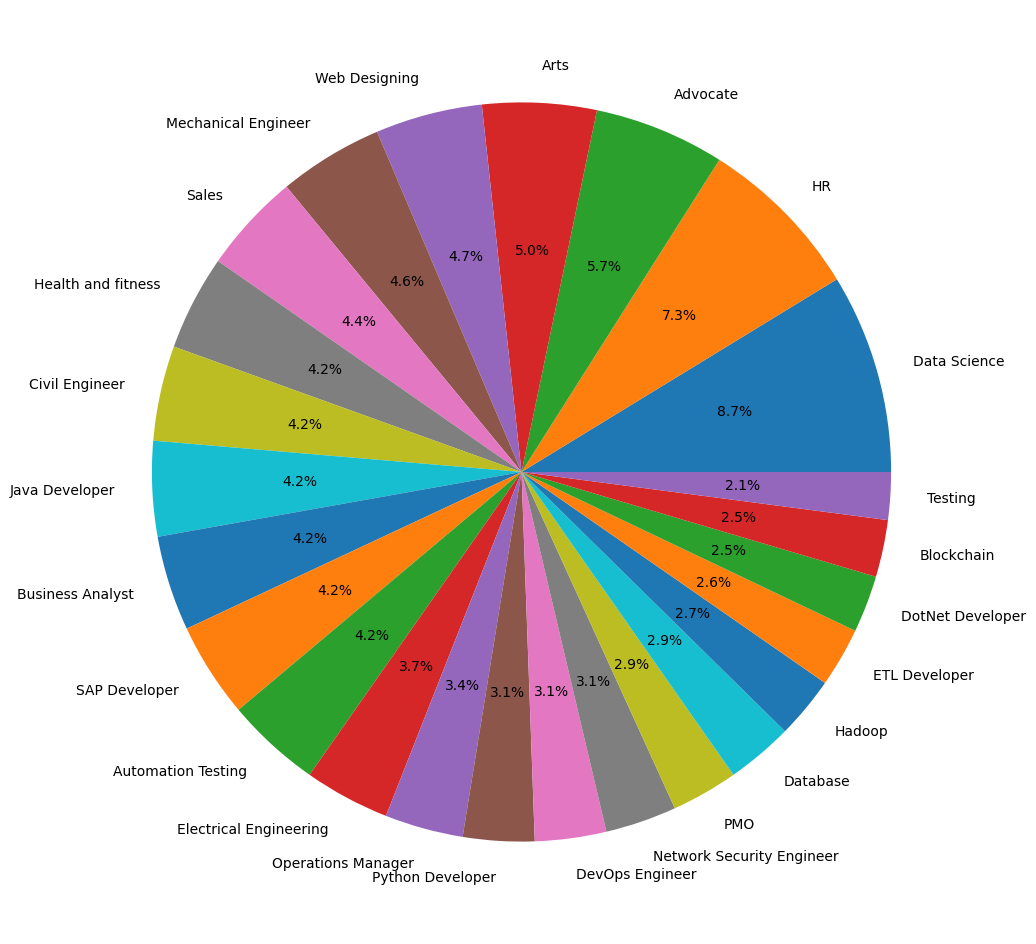

In [26]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,12))
plt.pie(counts,labels=
        labels,autopct="%1.1f%%")
plt.show()

## Blance classes

In [27]:
# Check the oriignal distrubution
print("Original Category Distrubution")
df['Category'].value_counts()

Original Category Distrubution


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

In [43]:
# get the largest category size(i.g.,the category with the maxmum  number of entries)

max_size = df['Category'].value_counts().max()

# Oversampling
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)
df = balanced_df
df['Resume'][0]

C:\Users\bablu\AppData\Local\Temp\ipykernel_24172\24697544.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


'Education Details \r\n LLB.   Dibrugarh University\r\nAdvocate \r\n\r\n\r\nSkill Details \r\nLegal.- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Legal.\r\ndescription - â\x80¢ Advocate'

# Cleaning data

- Urls
- hastags
- Mentions
- Special Characters
- Puncuation

In [46]:
# Regular Expressions
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

<>:4: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:6: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:7: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:8: SyntaxWarning: "\]" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\]"? A raw string is also an option.
<>:10: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:4: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:6: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not 

In [47]:
data = cleanResume("Please remove the some puncuation data ##? click this link https://bablu/userss.com with😁👇👇✔️")
data

'Please remove the some puncuation data click this link with '

In [53]:
# data = cleanResume(df['Resume'][0])
df['Resume'] = df['Resume'].apply(lambda x:cleanResume(x))
df['Resume'][0]

'Education Details LLB Dibrugarh University Advocate Skill Details Legal Exprience Less than 1 year monthsCompany Details company Legal description Advocate'

In [54]:
# convert word into category values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [55]:
df['Category'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
# Vectorizaation
